Name: Aditya Gujar <br>
USN: 2448505 <br>
Subject: Speech Processing and Recognition <br>
Lab-8

## Represent HMM Parameters in Python

In [6]:
import numpy as np
import random

# Hidden states
states = ['/s/', '/p/', '/ie:/', '/tS/']

# Observations
observations = ['Energy', 'Pitch', 'Duration']

# Initial probability (start from /s/)
pi = {'/s/': 1.0, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.0}

# Transition probability matrix
transition = {
    '/s/':  {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0},
    '/p/':  {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1},
    '/ie:/':{'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8},
    '/tS/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}
}

# Emission probability matrix
emission = {
    '/s/':  {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/':  {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/':{'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tS/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}
}


## Function to Display HMM Matrices

In [7]:
def display_hmm(pi, transition, emission):
    print("Initial Probabilities:")
    for st, prob in pi.items():
        print(f"{st}: {prob}")
    print("\nTransition Matrix:")
    for from_st, row in transition.items():
        print(from_st, "→", row)
    print("\nEmission Matrix:")
    for st, row in emission.items():
        print(st, "→", row)

display_hmm(pi, transition, emission)

Initial Probabilities:
/s/: 1.0
/p/: 0.0
/ie:/: 0.0
/tS/: 0.0

Transition Matrix:
/s/ → {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0}
/p/ → {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1}
/ie:/ → {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8}
/tS/ → {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}

Emission Matrix:
/s/ → {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1}
/p/ → {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2}
/ie:/ → {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2}
/tS/ → {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}


## Generate 1 phoneme sequence + corresponding observations

In [8]:
def sample_prob(prob_dict):
    states = list(prob_dict.keys())
    probs = list(prob_dict.values())
    return random.choices(states, probs)[0]

def generate_sequence():
    phoneme_seq = []
    observation_seq = []

    # Start state = /s/
    current = '/s/'
    phoneme_seq.append(current)

    # Generate phoneme transitions until reaching /tS/
    while current != '/tS/':
        current = sample_prob(transition[current])
        phoneme_seq.append(current)

    # Generate observations for each phoneme
    for ph in phoneme_seq:
        obs = sample_prob(emission[ph])
        observation_seq.append(obs)

    return phoneme_seq, observation_seq

phoneme_seq, obs_seq = generate_sequence()
print("Generated phoneme sequence:", phoneme_seq)
print("Generated observations:", obs_seq)


Generated phoneme sequence: ['/s/', '/p/', '/ie:/', '/ie:/', '/tS/']
Generated observations: ['Duration', 'Energy', 'Energy', 'Duration', 'Duration']


## Heatmap for Transition Probabilities

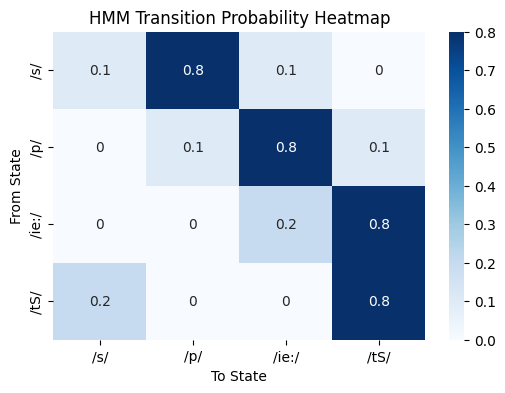

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert transition dictionary to matrix format
state_list = states
matrix = [[transition[s1][s2] for s2 in state_list] for s1 in state_list]

plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, cmap="Blues", xticklabels=state_list, yticklabels=state_list)
plt.title("HMM Transition Probability Heatmap")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()
